# The Spark Foundation

## Data Science and Business Analytics

### Task 6  :-  Prediction using Decision Tree Algorithm
### Create the Decision Tree classifier and visualize it graphically.
        
### Author :- Gayatri Dhumal

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Checking for null and duplicate values

print(df.isnull().sum(), '\n\nNumber of duplicate rows : ', df.duplicated().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows :  0


#### Check value counts for species column

In [7]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#### Convert Species col to numeric values

In [8]:
df.Species.replace({'Iris-versicolor' : 0, 'Iris-setosa' : 1, 'Iris-virginica' : 2}, inplace = True)

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


#### Split X and Y variables

In [10]:
x = df.iloc[:, 1:5]
y = df.iloc[:, -1]

#### Split the data into train and test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 21, test_size = 0.20)

#### Defining the Decision Tree Algorithm

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [13]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
pred = model.predict(x_test)
pred

array([0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 0, 1, 1, 0, 2], dtype=int64)

In [15]:
accuracy_score(y_test, pred)

0.9333333333333333

In [16]:
accuracy_score(y_train, model.predict(x_train))

1.0

In [17]:
print(confusion_matrix(y_test, pred))

[[10  0  2]
 [ 0 11  0]
 [ 0  0  7]]


In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00        11
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



#### Visualizing Decision Trees using Matplotlib

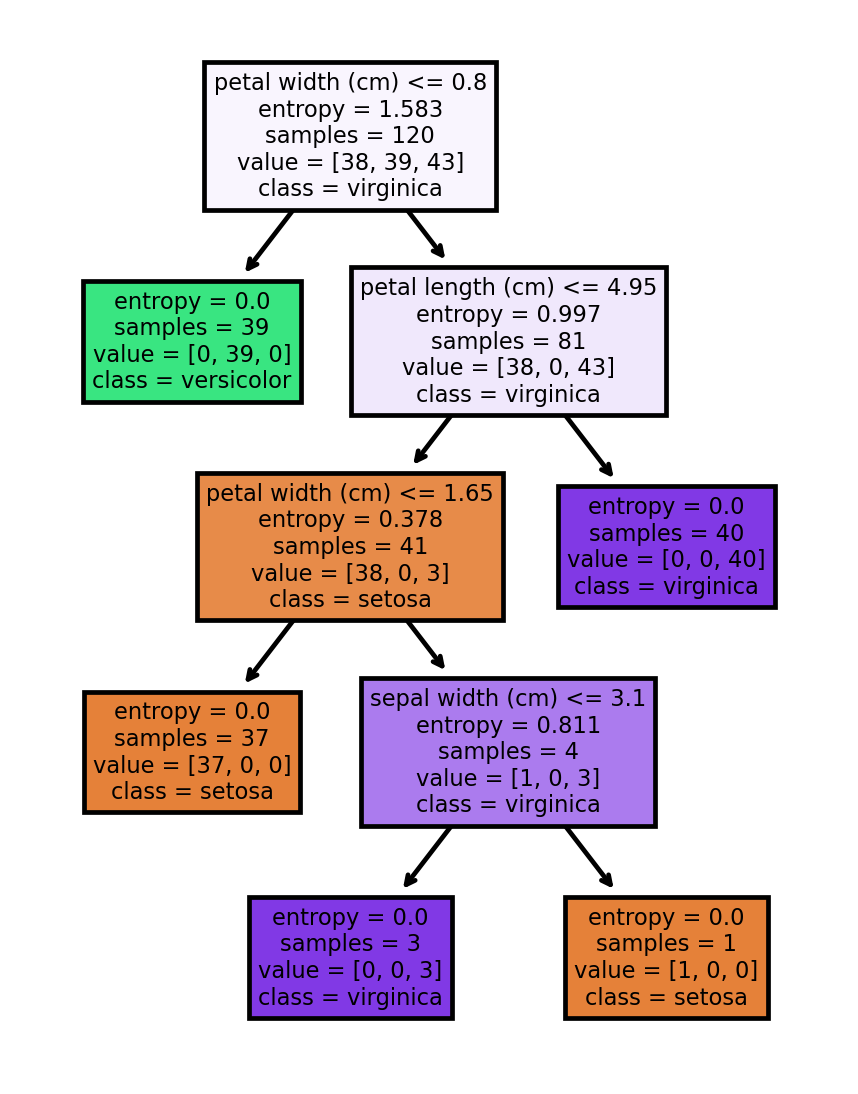

In [20]:
feature_name=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_name=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,4), dpi=340)
tree.plot_tree(model,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True);
fig.savefig('tree.png')